## 네이버 랭킹 그래프 그리기

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

In [6]:
t = np.array(['보헤미안 랩소디', '당갈', '아일라', '덕구', '쇼생크 탈출', '원더', '터미네이터 2', '인생은 아름다워', '매트릭스', '라이언 일병 구하기'])
y = np.array([9.70, 9.47, 9.47, 9.46, 9.42, 9.41, 9.40, 9.39, 9.39, 9.38])

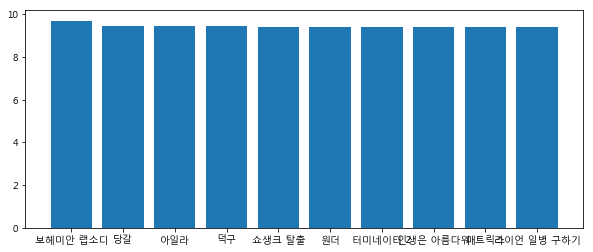

In [7]:
plt.figure(figsize=(10,4))
plt.bar(t, y)
plt.show()

## 오픈 데이터 활용

### 재미있는 사이트, Kaggle.com
> URL : https://www.kaggle.com/

타이타닉 데이터
> 알고있는 가설을 전제로 확인해보자

> - 가정1 : "실제 어린 아이들이 많이 생존했나? "
- 가정2 : "객실등급 1등급 인 사람들이 많이 살았다."
- 가정3 : "남자, 여자"

Datasets 다운 : data/taitanic_train.csv
> - 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

In [ ]:
'''
Data Description
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.
'''

### 과제1 : 남자/여자 수, 객실 등급별 수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df2 = df[['Sex','Pclass']]

In [9]:
# df2

In [13]:
sorted_df2 = df2.sort_values(['Sex', 'Pclass'])
# sorted_df2

In [ ]:
# for i in range(len(sorted_df2.index))
#     if sorted_df2['Sex'][i] == "male":
#         if sorted_df2['Pclass'][i] == "1":
            
#         elif sorted_df2['Pclass'][i] == "2":
            
#         else
#     elif sorted_df2['Sex'][i] == "male":
#         if sorted_df2['Pclass'][i] == "1":
            
#         elif sorted_df2['Pclass'][i] == "2":
            
#         else
#     else:
#         pass

In [37]:
f1 = df2.loc[(df2.Sex == 'female') & (df2.Pclass == 1), :]
f2 = df2.loc[(df2.Sex == 'female') & (df2.Pclass == 2), :]
f3 = df2.loc[(df2.Sex == 'female') & (df2.Pclass == 3), :]
m1 = df2.loc[(df2.Sex == 'male') & (df2.Pclass == 1), :]
m2 = df2.loc[(df2.Sex == 'male') & (df2.Pclass == 2), :]
m3 = df2.loc[(df2.Sex == 'male') & (df2.Pclass == 3), :]

In [61]:
# f = lambda x: x.count()
# f1.appy(f)

In [67]:
f11 = f1.Pclass.count()
f21 = f2.Pclass.count()
f31 = f3.Pclass.count()
m11 = m1.Pclass.count()
m21 = m2.Pclass.count()
m31 = m3.Pclass.count()

In [68]:
data = {'male': [m11, m21, m31],
       'female' : [f11, f21, f31]}
frame = DataFrame(data)

In [69]:
frame2 = DataFrame(data, columns=['male', 'female'], index=[1, 2, 3])
frame2

,male,female
1,122,94
2,108,76
3,347,144


In [73]:
frame3 = frame2.T
frame3

,1,2,3
male,122,108,347
female,94,76,144


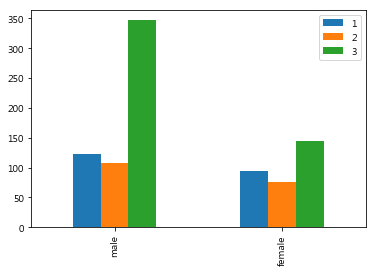

In [78]:
frame3.plot(kind='bar')